In [2]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import LMSC_optimize
from visualizingData import *
import pandas as pd
import os
import ast

In [15]:

# Define the path to the CSV file
csv_path = '../data/ml-32m/ratings.csv'

# Read the CSV file
# 30M rows so taking only 1k
df = pd.read_csv(csv_path, nrows=100000)



# Extract columns into arrays (lists)
user_ids = df['userId'].tolist()
movie_ids = df['movieId'].tolist()
ratings = df['rating'].tolist()
timestamps = df['timestamp'].tolist()

# Print the arrays to verify
print("User IDs:", user_ids)
print("Movie IDs:", movie_ids)
print("Ratings:", ratings)
print("Timestamps:", timestamps)

User IDs: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [21]:
min(ratings)

0.5

In [16]:

# Step 3: Map user IDs and movie IDs to unique indices
user_map = {user_id: index for index, user_id in enumerate(set(user_ids))}
movie_map = {movie_id: index for index, movie_id in enumerate(set(movie_ids))}

# Convert user and movie IDs to their mapped indices
user_indices = [user_map[user_id] for user_id in user_ids]
movie_indices = [movie_map[movie_id] for movie_id in movie_ids]

# Step 4: Create the sparse matrix in CSC format
num_users = len(user_map)
num_movies = len(movie_map)
ratings_matrix = csc_matrix((ratings, (user_indices, movie_indices)), shape=(num_users, num_movies))

# Print the sparse matrix details
print(f"Sparse Matrix Shape: {ratings_matrix.shape}")
print(f"Number of Non-Zero Entries: {ratings_matrix.nnz}")
print(ratings_matrix)

Sparse Matrix Shape: (626, 10225)
Number of Non-Zero Entries: 100000
  (9, 0)	2.5
  (10, 0)	3.0
  (16, 0)	4.0
  (18, 0)	3.0
  (19, 0)	5.0
  (22, 0)	3.0
  (23, 0)	4.0
  (27, 0)	4.0
  (32, 0)	5.0
  (33, 0)	4.0
  (35, 0)	3.0
  (36, 0)	1.0
  (42, 0)	5.0
  (45, 0)	4.0
  (50, 0)	3.5
  (53, 0)	4.0
  (56, 0)	4.0
  (58, 0)	4.0
  (59, 0)	3.0
  (61, 0)	5.0
  (63, 0)	5.0
  (64, 0)	2.0
  (66, 0)	4.0
  (69, 0)	4.0
  (73, 0)	4.5
  :	:
  (239, 10217)	1.5
  (264, 10217)	2.5
  (327, 10217)	4.5
  (332, 10217)	4.0
  (343, 10217)	4.0
  (524, 10217)	5.0
  (546, 10217)	4.0
  (244, 10218)	3.0
  (315, 10219)	0.5
  (140, 10220)	4.0
  (264, 10220)	3.5
  (325, 10220)	4.5
  (609, 10220)	0.5
  (502, 10221)	4.0
  (264, 10222)	4.5
  (546, 10222)	3.0
  (197, 10223)	4.0
  (239, 10223)	2.0
  (267, 10223)	3.5
  (327, 10223)	5.0
  (359, 10223)	4.0
  (456, 10223)	5.0
  (502, 10223)	4.0
  (555, 10223)	0.5
  (359, 10224)	4.0


In [17]:
ratings_matrix.toarray()

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3.5, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

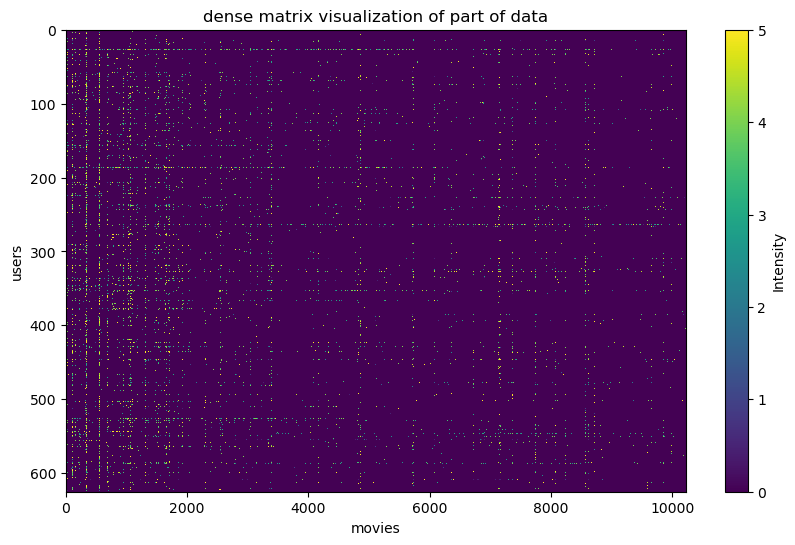

In [18]:
visualizeData(ratings_matrix.toarray())

In [19]:
dense_matrix = ratings_matrix.toarray()
sampled_mask = np.where(dense_matrix==0,np.nan,1)

In [20]:
dense_matrix.shape

(626, 10225)

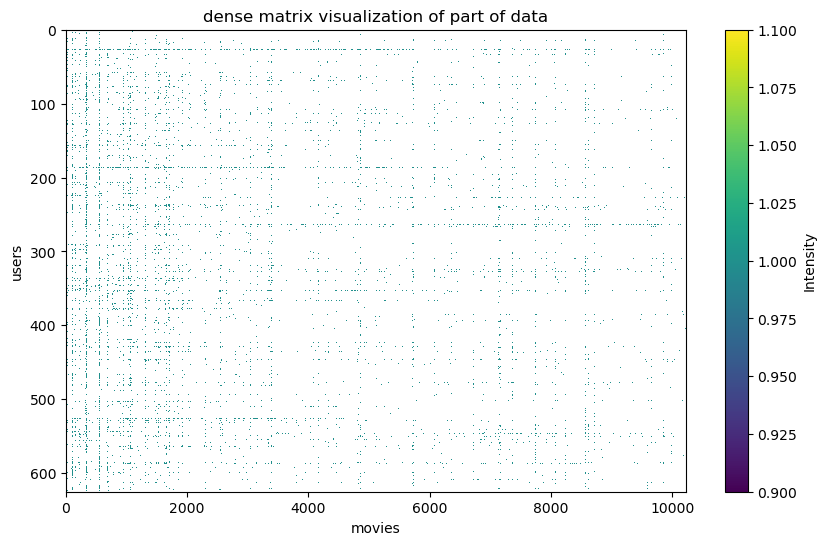

In [21]:
visualizeData(np.where(dense_matrix==0,np.nan,1))

In [22]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

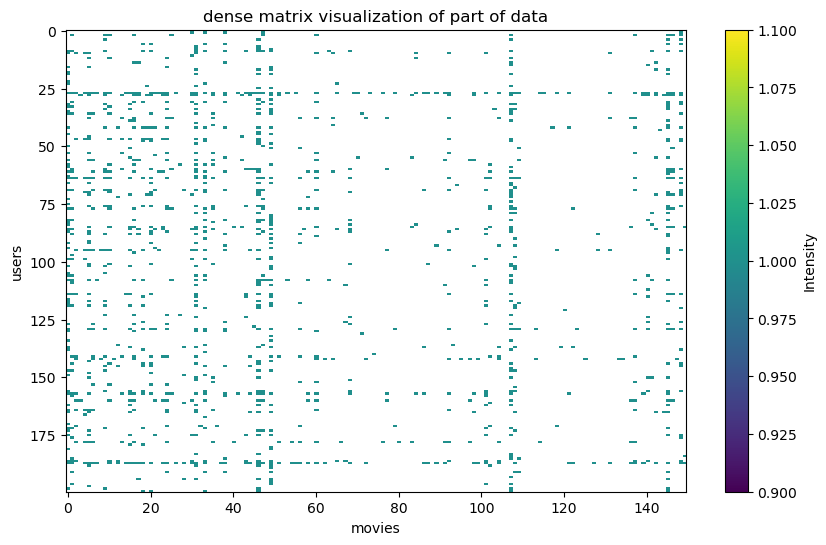

In [23]:
visualizeData(sampled_mask)

In [24]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization

# Generate rhos for each lambda
# rhos = np.round(100*np.arange(.1,.1, .01))/100

rhos = np.round(10*np.arange(.1,3.1, .1))/10
# List to store results
results = []




In [25]:

rhos = np.round(10*np.arange(.1,3.1, .1))/10

In [58]:
rhos

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [59]:

    
# Iterate over rho values
for rho in rhos: 
    # Iterate over lambda values
    for lambda_ in lambdas:
        # Iterate over gamma values
        
        for gamma in gammas:
            # Calculate epsilon based on matrix size and gamma
            epsilon = m * n * gamma  # Error threshold as defined in the paper
            
            # Print current parameter settings
            print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

            # Run the optimization function with the current parameters
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors = LMSC_optimize(
                rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations
            )
            
            print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}\n")
            # Store the results in a dictionary
            result = {
                'lambda': lambda_,
                'rho': rho,
                'gamma': gamma,
                'errors': errors,
                'relative_errors': r_errors
            }
            results.append(result)


Current settings: gamma = 0.0, rho = 0.01, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.01, lambda = 0.1

Current settings: gamma = 0.001, rho = 0.01, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.01, lambda = 0.1

Current settings: gamma = 0.01, rho = 0.01, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.01, lambda = 0.1

Current settings: gamma = 0.0, rho = 0.01, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.01, lambda = 0.2

Current settings: gamma = 0.001, rho = 0.01, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.01, lambda = 0.2

Current settings: gamma = 0.01, rho = 0.01, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.01, lambda = 0.2

Current settings: gamma = 0.0, rho = 0.01, lambda = 0.3
Is lambda smaller th

In [60]:
# Assuming 'results' is the list you populated with dictionaries as shown earlier
results_df = pd.DataFrame(results)  # Convert the results list to a DataFrame

# Define the directory name
directory = 'convergence_results'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the DataFrame
file_path = os.path.join(directory, 'conv_results_movieLens_R100k_rho001-01_200x150.csv')

# Save the DataFrame as a CSV file
results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Results saved to convergence_results\conv_results_movieLens_R100k_rho001-01_200x150.csv


In [3]:


# Define the directory and file path
directory = 'convergence_results'
file_path = os.path.join(directory, 'conv_results_movieLens_R100k_200x150.csv')

# Load the DataFrame from the CSV file
results_df = pd.read_csv(file_path)

# Display the loaded DataFrame
print(results_df.head())  # Show the first few rows of the DataFrame


   lambda  rho  gamma                                             errors  \
0     0.1  0.1  0.000  [[3.0822270926272, 1.9126655490152724], [2.841...   
1     0.1  0.1  0.001  [[3.0822270926272, 1.9126655490152724], [2.841...   
2     0.1  0.1  0.010  [[3.0822270926272, 1.9126655490152724], [2.841...   
3     0.2  0.1  0.000  [[3.0822270926272, 1.9126655490152724], [3.340...   
4     0.2  0.1  0.001  [[3.0822270926272, 1.9126655490152724], [3.340...   

                                     relative_errors  
0  [(nan, 1.743703537802539, 13.265720043037895),...  
1  [(nan, 1.743703537802539, 13.265720043037895),...  
2  [(nan, 1.743703537802539, 13.265720043037895),...  
3  [(nan, 1.743703537802539, 13.265720043037895),...  
4  [(nan, 1.743703537802539, 13.265720043037895),...  


In [4]:

# Suppose you have specific values for lambda, rho, and gamma
lambda_ = 0.1
rho = 0.10
gamma = 0.001
# Example of selecting errors for specific lambda, rho, and gamma
specific_errors = results_df[
    (results_df['lambda'] == lambda_) &
    (results_df['rho'] == rho) &
    (results_df['gamma'] == gamma)
]
# Convert 'errors' and 'relative_errors' columns to NumPy arrays
errors_array = specific_errors['errors'].to_numpy()
relative_errors_array = specific_errors['relative_errors'].to_numpy()



In [5]:
results_df[results_df['rho'] == 0.7]

lambda  rho  gamma                                             errors  \
180     0.1  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [0....   
181     0.1  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [0....   
182     0.1  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [0....   
183     0.2  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [0....   
184     0.2  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [0....   
185     0.2  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [0....   
186     0.3  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [0....   
187     0.3  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [0....   
188     0.3  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [0....   
189     0.4  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [0....   
190     0.4  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [0....   
191     0.4  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [0....   
192     0.5  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [1....   
193     0.5  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [1....   
194     0.5  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [1....   
195     0.6  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [1....   
196     0.6  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [1....   
197     0.6  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [1....   
198     0.7  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [1....   
199     0.7  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [1....   
200     0.7  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [1....   
201     0.8  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [1....   
202     0.8  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [1....   
203     0.8  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [1....   
204     0.9  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [1....   
205     0.9  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [1....   
206     0.9  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [1....   
207     1.0  0.7  0.000  [[0.7232074697725439, 0.3754713726969537], [1....   
208     1.0  0.7  0.001  [[0.7232074697725439, 0.3754713726969537], [1....   
209     1.0  0.7  0.010  [[0.7232074697725439, 0.3754713726969537], [1....   

                                       relative_errors  
180  [(nan, 0.11499572997080196, 0.511218330601095)...  
181  [(nan, 0.11499572997080196, 0.511218330601095)...  
182  [(nan, 0.11499572997080196, 0.511218330601095)...  
183  [(nan, 0.11499572997080196, 0.511218330601095)...  
184  [(nan, 0.11499572997080196, 0.511218330601095)...  
185  [(nan, 0.11499572997080196, 0.511218330601095)...  
186  [(nan, 0.11499572997080196, 0.511218330601095)...  
187  [(nan, 0.11499572997080196, 0.511218330601095)...  
188  [(nan, 0.11499572997080196, 0.511218330601095)...  
189  [(nan, 0.11499572997080196, 0.511218330601095)...  
190  [(nan, 0.11499572997080196, 0.511218330601095)...  
191  [(nan, 0.11499572997080196, 0.511218330601095)...  
192  [(nan, 0.11499572997080196, 0.511218330601095)...  
193  [(nan, 0.11499572997080196, 0.511218330601095)...  
194  [(nan, 0.11499572997080196, 0.511218330601095)...  
195  [(nan, 0.11499572997080196, 0.511218330601095)...  
196  [(nan, 0.11499572997080196, 0.511218330601095)...  
197  [(nan, 0.11499572997080196, 0.511218330601095)...  
198  [(nan, 0.11499572997080196, 0.511218330601095)...  
199  [(nan, 0.11499572997080196, 0.511218330601095)...  
200  [(nan, 0.11499572997080196, 0.511218330601095)...  
201  [(nan, 0.11499572997080196, 0.511218330601095)...  
202  [(nan, 0.11499572997080196, 0.511218330601095)...  
203  [(nan, 0.11499572997080196, 0.511218330601095)...  
204  [(nan, 0.11499572997080196, 0.511218330601095)...  
205  [(nan, 0.11499572997080196, 0.511218330601095)...  
206  [(nan, 0.11499572997080196, 0.511218330601

In [6]:
# Assuming your DataFrame is named df_results
rho_10_data = results_df[results_df['rho'] == .1]

# Display the filtered data
print(rho_10_data)


    lambda  rho  gamma                                             errors  \
0      0.1  0.1  0.000  [[3.0822270926272, 1.9126655490152724], [2.841...   
1      0.1  0.1  0.001  [[3.0822270926272, 1.9126655490152724], [2.841...   
2      0.1  0.1  0.010  [[3.0822270926272, 1.9126655490152724], [2.841...   
3      0.2  0.1  0.000  [[3.0822270926272, 1.9126655490152724], [3.340...   
4      0.2  0.1  0.001  [[3.0822270926272, 1.9126655490152724], [3.340...   
5      0.2  0.1  0.010  [[3.0822270926272, 1.9126655490152724], [3.340...   
6      0.3  0.1  0.000  [[3.0822270926272, 1.9126655490152724], [3.567...   
7      0.3  0.1  0.001  [[3.0822270926272, 1.9126655490152724], [3.567...   
8      0.3  0.1  0.010  [[3.0822270926272, 1.9126655490152724], [3.567...   
9      0.4  0.1  0.000  [[3.0822270926272, 1.9126655490152724], [3.576...   
10     0.4  0.1  0.001  [[3.0822270926272, 1.9126655490152724], [3.576...   
11     0.4  0.1  0.010  [[3.0822270926272, 1.9126655490152724], [3.576...   

In [7]:
import ast
rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


C:\Users\kesol\AppData\Local\Temp\ipykernel_27800\1895181154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


In [8]:
last_2_errors = []
for err_list in np.array(rho_10_data['errors']):
    last_2_errors.append(err_list[-1])

In [9]:
last_2_errors

[[2.5123313828003653, 2.616347494600959],
 [2.5123313828003653, 2.616347494600959],
 [2.5123313828003653, 2.616347494600959],
 [3.150565797796219, 3.267385686629357],
 [3.150565797796219, 3.267385686629357],
 [3.150565797796219, 3.267385686629357],
 [3.5121102513918743, 3.6551702399895247],
 [3.5121102513918743, 3.6551702399895247],
 [3.5121102513918743, 3.6551702399895247],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.56042654028436, 3.7132879108688486],
 [3.560

In [68]:

# Convert data to a numpy array for easier slicing
data_array = np.array(last_2_errors)


# Split data into three groups for gamma values
gamma_0_data = data_array


In [69]:
# Prepare data for three different gamma values
gamma_0_data = data_array[::3]       # Rows for gamma = 0
gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01

In [10]:

def rhoCheckPlots(rho):
    # Assuming your DataFrame is named df_results
    rho_10_data = results_df[results_df['rho'] == rho]

    rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


    last_2_errors = []
    for err_list in np.array(rho_10_data['errors']):
        last_2_errors.append(err_list[-1])

    # Convert data to a numpy array for easier slicing
    data_array = np.array(last_2_errors)

    # Prepare data for three different gamma values
    gamma_0_data = data_array[::3]       # Rows for gamma = 0
    gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
    gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01
    

    MAE_1 = gamma_0_data[:,0]
    MAE_2 = gamma_001_data[:,0]
    MAE_3 = gamma_01_data[:,0]
    # x = lambdas
    plt.plot(lambdas,MAE_3, 'o-' ,label='gamma=0.01')
    plt.plot(lambdas,MAE_2,'o-' ,label='gamma=0.001')
    plt.plot(lambdas,MAE_1, 'o-' ,label='gamma=0')
    plt.xlabel('lambda')
    plt.ylabel('MAE')
    
    plt.title(f"MAE Error for Lambdas at rho={rho}")
    plt.legend()
    plt.show()
    
    # RMSE_1 = gamma_0_data[:,1]
    # RMSE_2 = gamma_001_data[:,1]
    # RMSE_3 = gamma_01_data[:,1]
    # # x = lambdas
    # plt.plot(lambdas,RMSE_3, 'o-' ,label='gamma=0.01')
    # plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    # plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    # plt.xlabel('lambda')
    # plt.ylabel('RMSE')
    
    # plt.title(f"RMSE Error for Lambdas at rho={rho}")
    # plt.legend()
    # plt.show()

In [11]:
rhos

NameError: name 'rhos' is not defined

C:\Users\kesol\AppData\Local\Temp\ipykernel_27800\3009211224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


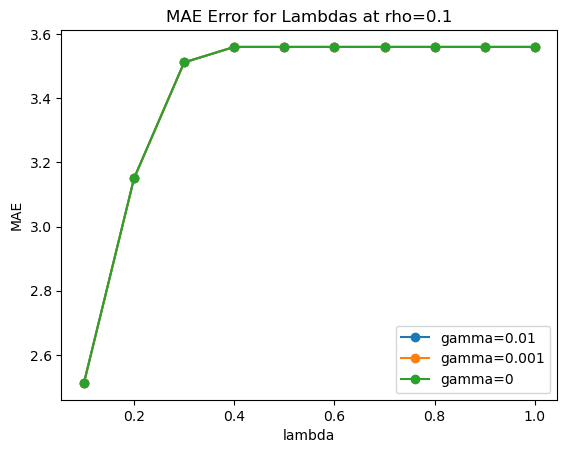

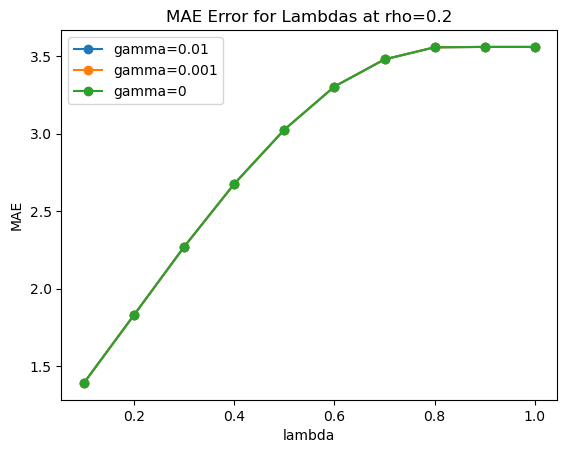

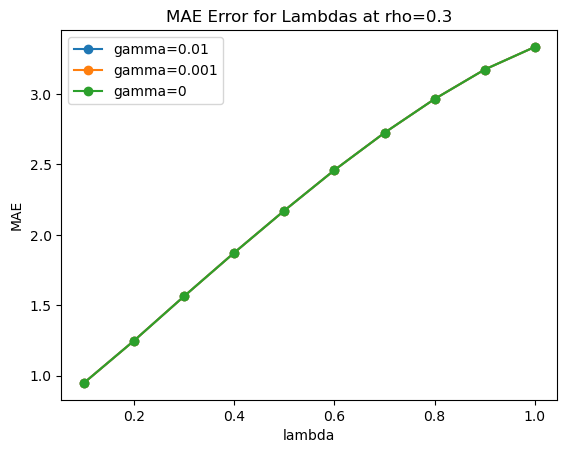

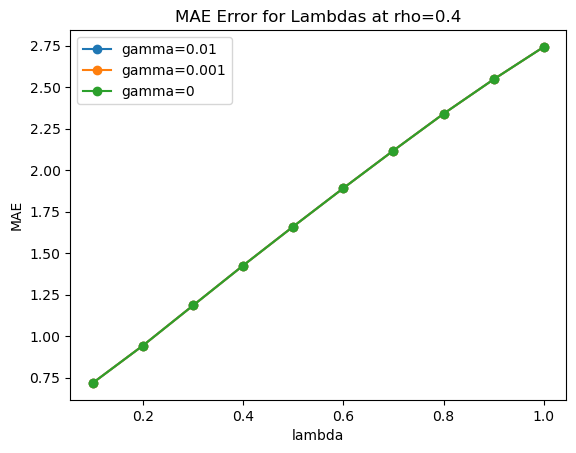

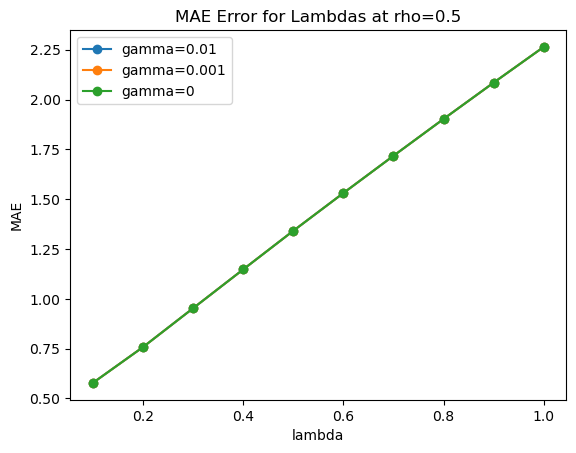

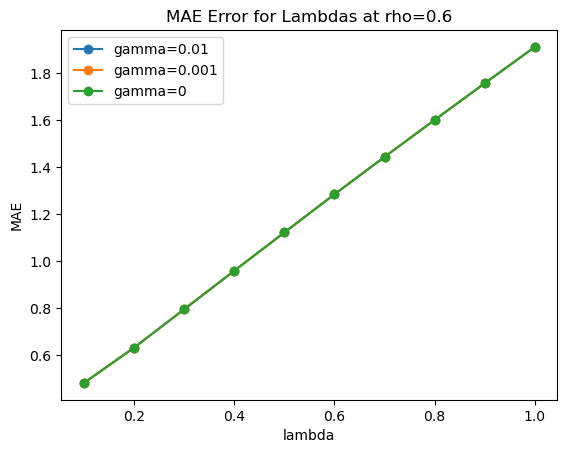

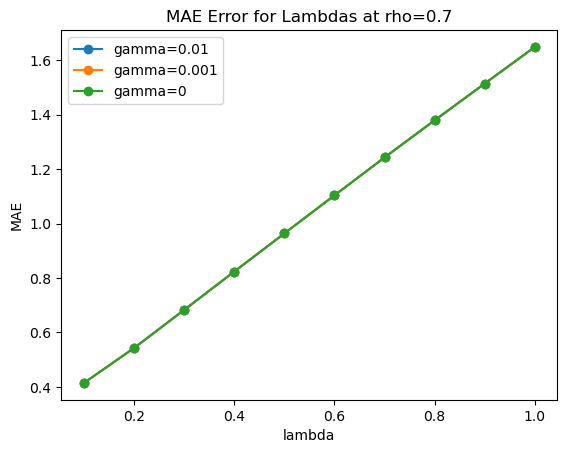

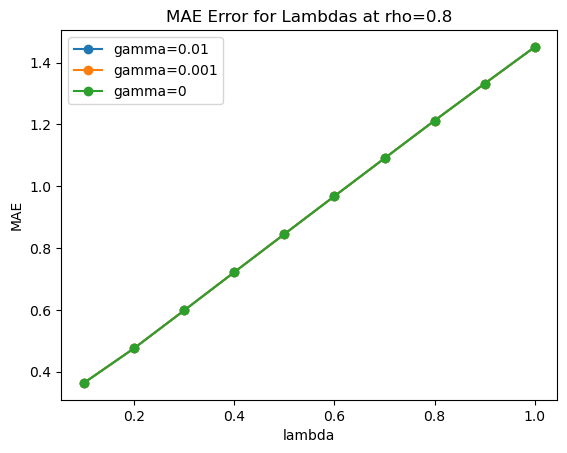

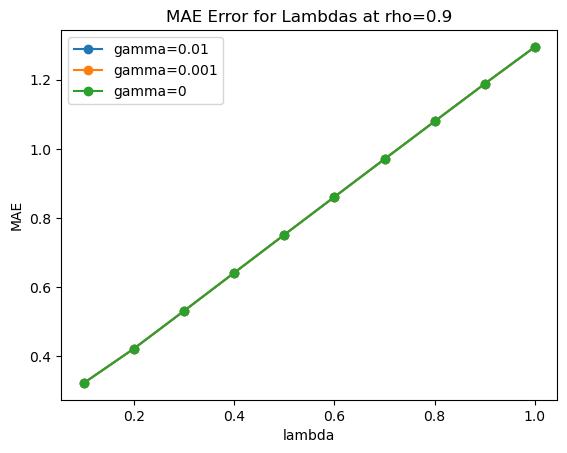

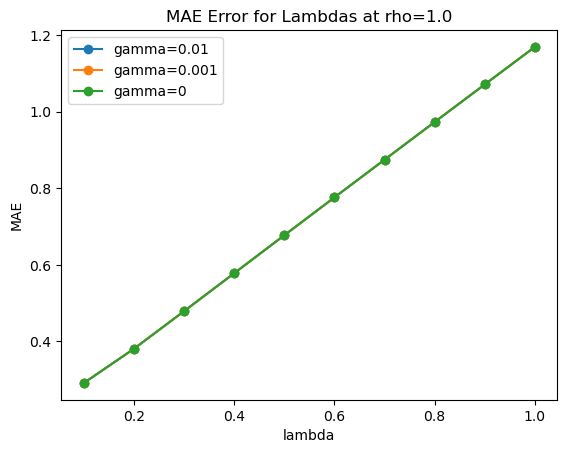

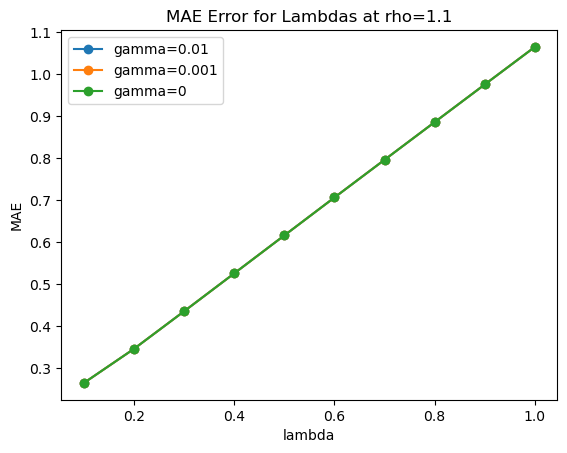

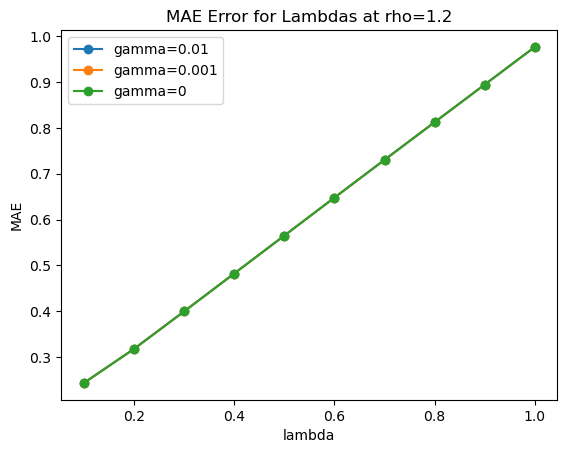

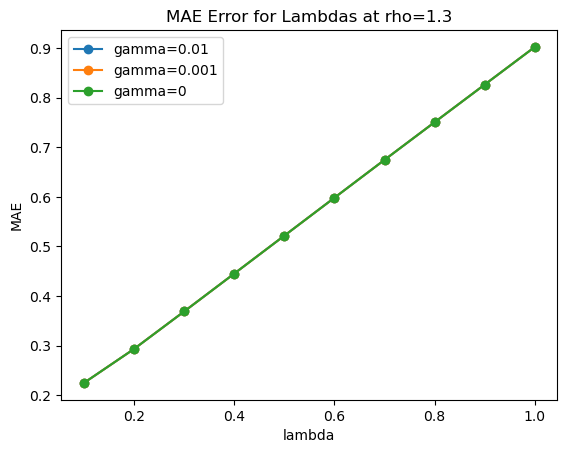

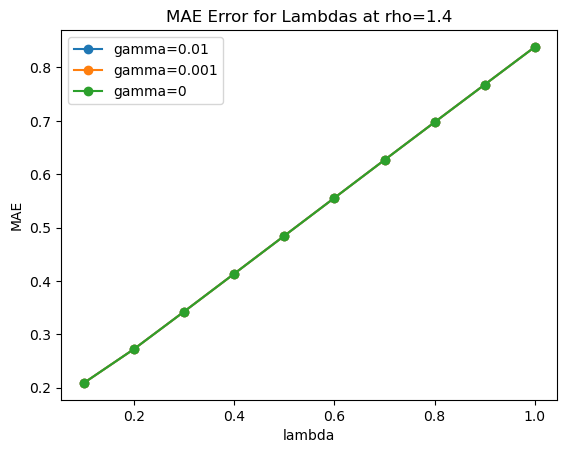

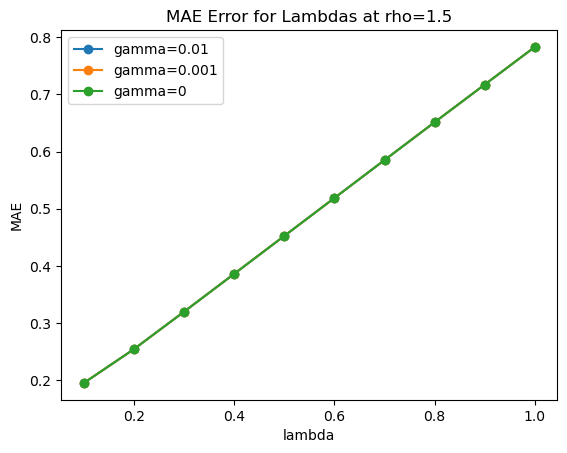

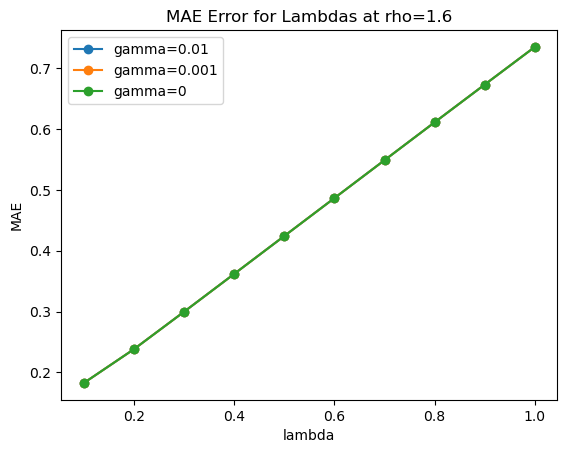

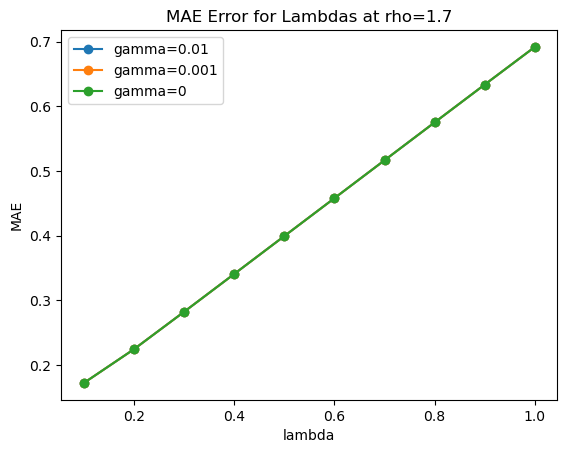

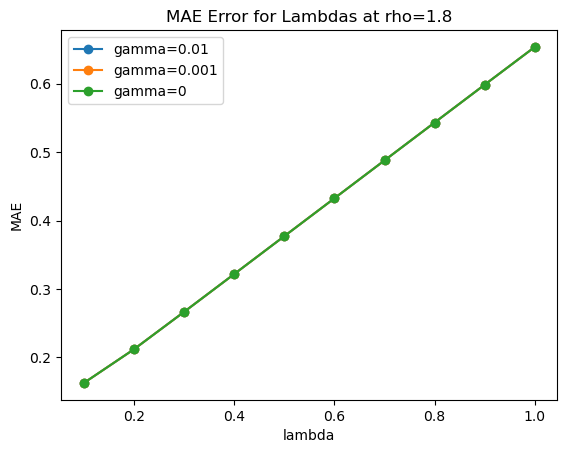

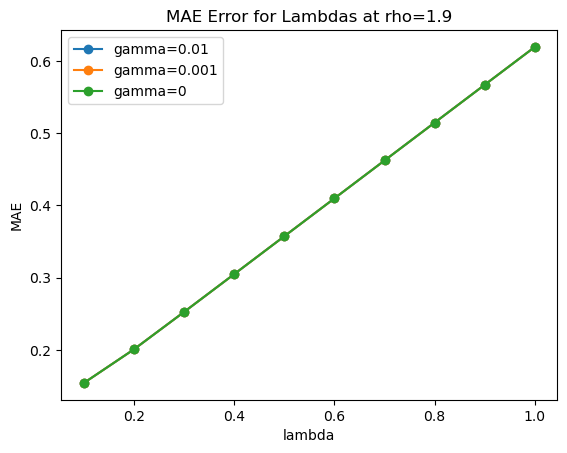

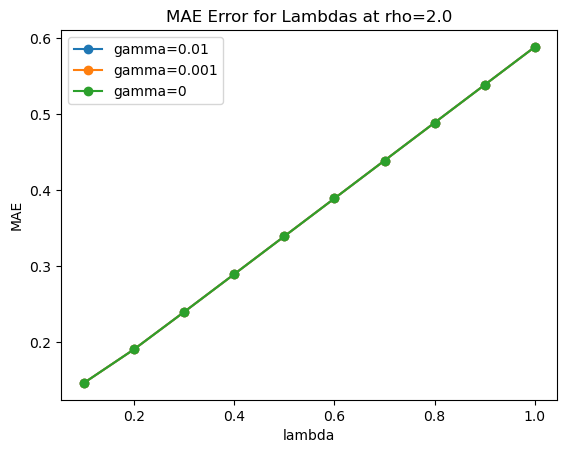

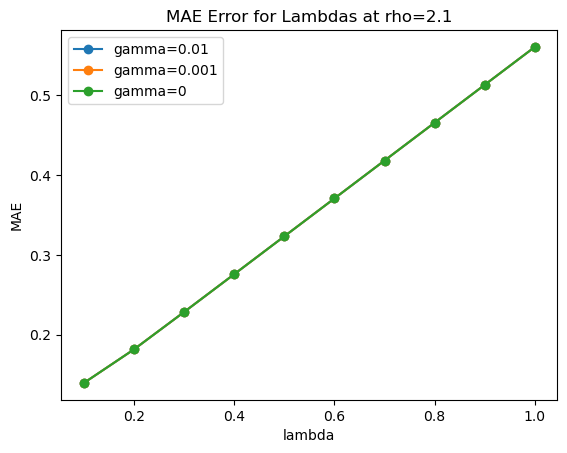

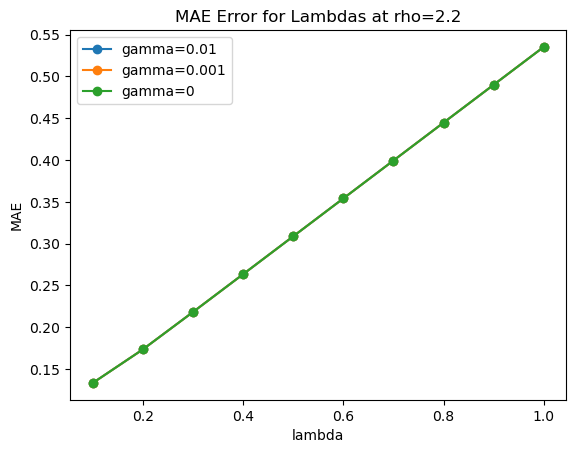

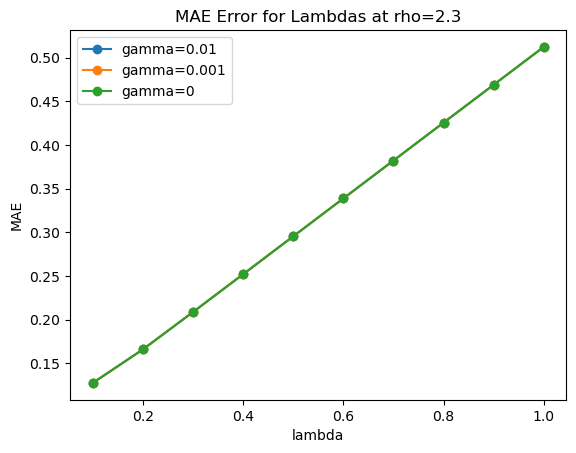

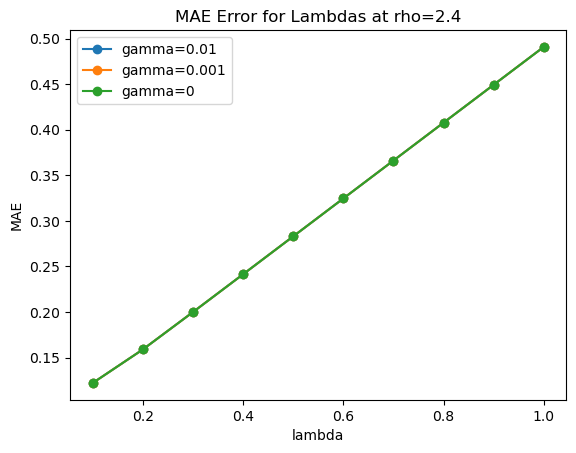

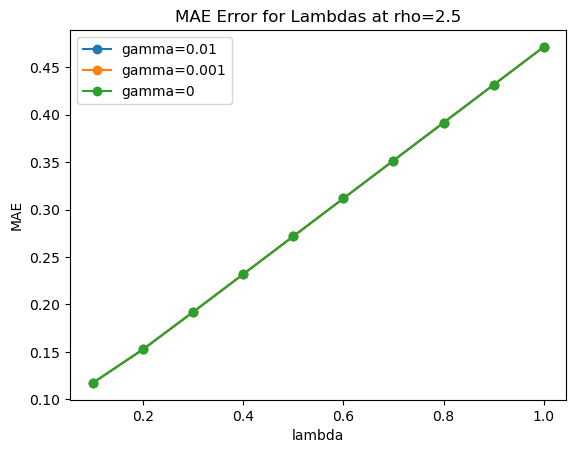

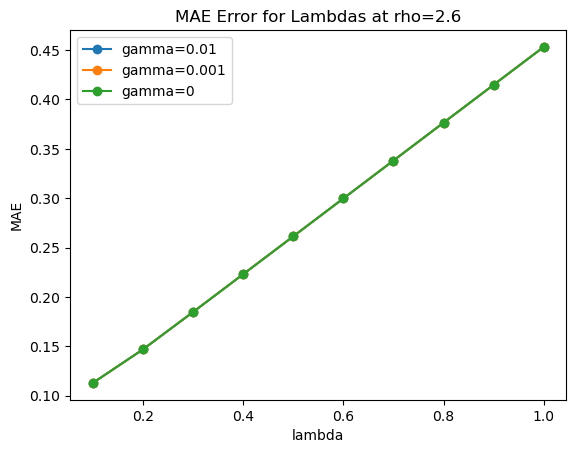

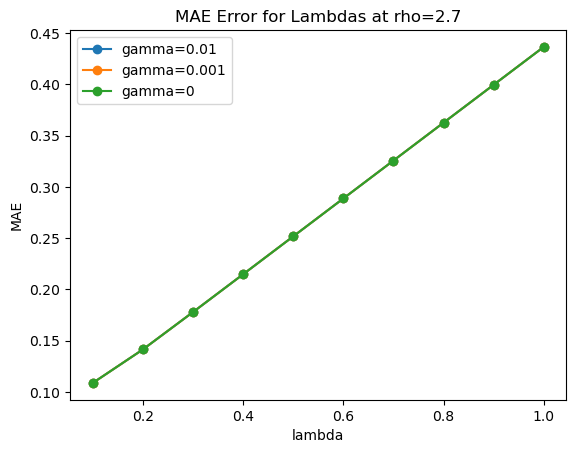

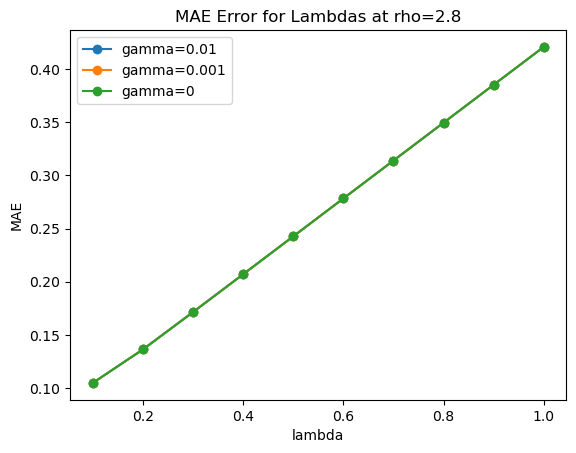

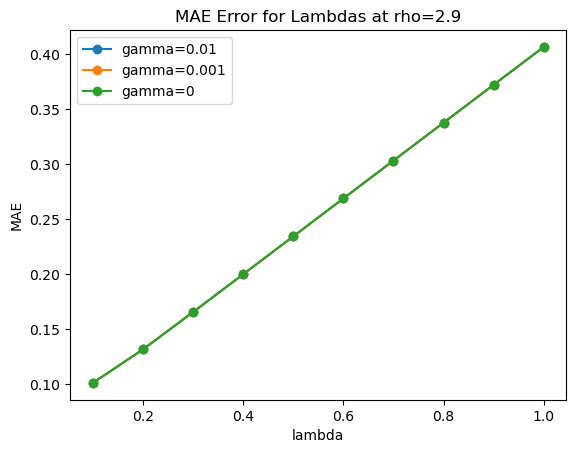

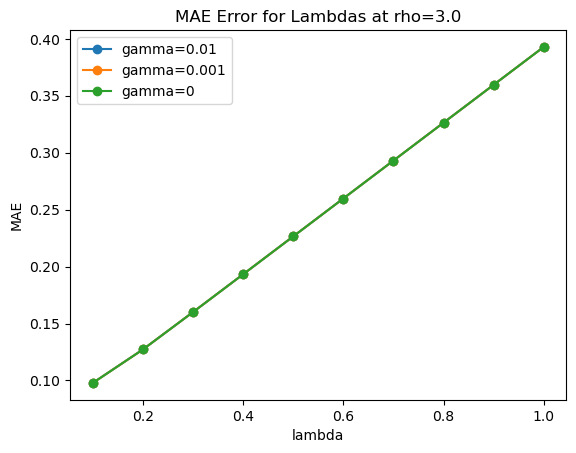

In [26]:
for rho in rhos:
    rhoCheckPlots(rho)

In [84]:
rhoCheckPlots(rhos)

ValueError: ('Lengths must match to compare', (900,), (9,))

In [50]:
errorPlot(errors_array)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>